# Power Production - a Machine Learning project

The assignment project for Machine Learning and Statistics, GMIT 2020-2021

Lecturer: Dr. Ian McLoughlin

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com


This Notebook should be read in conjunction with the corresponding README.md file at the project [repository](https://github.com/andkoc001/Machine-Learning-and-Statistics-Project.git) at GitHub.

## To do rough plan

`delete me once job done`

- Project intro
- Do research on wind power - write a short paragraph on findings  
- Exploratory analysis the raw data set  
    - add zones A, B, C, D to the plot
- Pick one - linear regression - ML algorithm and apply to the data set - explain the model  
- Pick another ML algorithm - Neural Networks regression - apply and explain the model
- Perform accuracy analysis of the predictions  
- Write a python script to run the web service (use pickle module?)  
- Write a brief conclusion
- Style the web service

___
## Introduction

### Project objectives

The objective of the is to develop a web service to make predictions using Machine Learning (ML) paradigm. 

The goal of the project is to produce a model or models that, based on the provided dataset `powerproduction`, and through applying the appropriate ML techniques, predicts power output generated by wind turbine from wind. The power output predictions should be generated in response to wind speed values to be obtained as HTTP requests.

Further details can be found in the [project brief](https://github.com/andkoc001/Machine-Learning-and-Statistics/blob/main/assessment.pdf).

### Project delivery

The project is about development of a machine learning model(s) in Jupyter Notebook environment, using existing algorithms and tools, such as Keras, TensorFlow or Scikit learn packages. The model(s) are assesst on their accuracy.

Based on the model(s), a Python script is developed to run a web service, using Flask package. The web service is built in a Docker container. 

___
## Wind Power

Wind power (or wind energy) is a general term describing energy generated from wind, where the wind kinetic enrgy is converted into electrical power. Typically, the power is generated in wind turbins.

There is many factors influencing the generated output, but wind speed is a fundamental contributor. Wikipedia article states that the power is proportional to the third power of the wind speed ([Wind power](https://en.wikipedia.org/wiki/Wind_power)):

$$
P = \frac{1}{2} A \rho v^3
$$

where $P$ is the power output, $A$ corresponds to the size of the turbin, $\rho$ is the air density and $v$ is the wind speed.

However, in practical terms, the observed power output follows a more complex pattern ([Wind education - Wind power](https://energyeducation.ca/encyclopedia/Wind_power)).

![https://energyeducation.ca/wiki/images/thumb/1/19/Windpowercurve.png/400px-Windpowercurve.png](https://energyeducation.ca/wiki/images/thumb/1/19/Windpowercurve.png/400px-Windpowercurve.png)

The wind turbin activates on a certain treshold wind speed - cut-in speed. Below that speed the turbin operation is not economically viable. 

The maximum power output is achieved at the rated wind speed - turbin specific. In the zone between the cut-in and rated speeds, the power increases exponencially with the wind speed. 

Behind the rated speed, the produced output remains approximately flat (or may decline gently), until it reaches the cut-off speed. At such speed, the turbine is shut down in order to prevent them from taking damege. 

It is also worth noting that the above power curve is only a crude approximation of the observed amount of energy produced in reality. 

___
## Setting the environment

This notebook documents the project development. Please also refer to README.md file in this repository for general information.

### Importing required libraries

For this project the external packages and modules are used. All of them are imported in the cell(s) below. It is required to import the packages and modules before running the succeding cells.

1. Numpy - for numerical operations on arrays
2. Pandas - for DataFrame data type
3. Scikit-learn (aka sklearn) - for Machine Learning algorithms
4. Matplotlib - for plotting and visualisation
5. Seaborn - for enhanced plotting and visualisation

In [ ]:
# ignore deprecated warnings
import warnings
warnings.filterwarnings("ignore")

In [1]:
# import libraries and packages - see description above
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set plotting style
plt.style.use('ggplot')
# set default figure size
plt.figure(figsize=(14,8))
plt.rcParams["figure.figsize"] = (14,8)
# plot matplotlib graphs next to the code
%matplotlib inline

### Loading the data set from a file

The data set provided for the project is loaded from the file powerproduction.txt (in the repository). It is stored as a DataFrame and assigned under the name `df_raw`.

In [3]:
# load the data set from file
df_raw = pd.read_csv(r"powerproduction.txt")

### A glance into the data set

The dataset we are going to work on this project is `powerproduction`. Let us take a sneak peek as to how this dataset looks like. We will attempt to evaluate its size, basic statistical properties, distributions, etc. as well as produce some plots for a better understanding of its properties.  

In [ ]:
# show the data set
# df_raw # commented out not to clutter the notebook

In [ ]:
# rudimentary statistical insight into the data set
df_raw.describe()

In [ ]:
# plot the data points
sns.relplot(data=df_raw, x="speed", y="power", s=10, palette="pastel") #, height=5, aspect=3)

### Exploratory data analysis

From the above dataset description and data points plot, the following conclusions can be drawn.

The data set consist of 500 observations (rows). Each observation consists of 2 attributes (columns): wind speed (`speed`) and corresponding power output (`power`). The units of the values are not explicitly given.

The wind speed values varies from 0 to 25 and are shown in ascending order. Every speed value is unique. The power output values varies from 0 to 113.556. There are 49 instances (approximatelly 10% of all observations) where the power output equals zero.

From the plot one can observe three distinct areas with different behaviour of the data points. I will refer to them as zones A, B, C and D.

A - The wind speed ranging from 0 to about 8, genreates virtually no power output.  
B - In wind speed range from about 9 to about 17, there is an apparent linear correlation between the wind speed and the power output.  
C - When wind speed exceeds approximately 17, the wind turbines work with a high performance. However, the power output declines slightly with incrasing wind speed, up to approximately 24.  
D - Above wind speed level of approximately 24, the power output abruptly ceases.

Such a behavior agrees closely with the plot shown above ([Wind education - Wind power](https://energyeducation.ca/encyclopedia/Wind_power)). It can be explained by the fact that at low wind speed (zone A) the wind does not carry sufficient energy to turn the turbines or it is not economically justified and so do not generate any power. On the other hand, in the zone D where the winds are very strong, the power output is not produced, possibly because the turbines are shut off for safety reasons.

Occasionally, there is a number of observations where the power output is zero, even though the wind speeds are in zones allowing for producing the power. In total, there is 49 observations with power output equal to zero. It is assumed these data points represent observations during, for example, maintenance works, when the turbin was shut down.

In [ ]:
# There is 49 (about 10%) of the observation with zero power output 
df_raw[df_raw.power == 0].count()

In [ ]:
# Histogram of power outputs - frequency of occurance - 'zero' values seem to distort the plot
plt.rcParams["figure.figsize"] = (14,4)
sns.distplot(df_raw.power, bins=100, kde=False)
plt.show()

The analysis of the wind speed distribution shows that the wind speed appears to uniformly distribute, with no particular wind speed dominating.

In [ ]:
# what wind speeds dominate - it appears to be more or less uniformely distributed
plt.rcParams["figure.figsize"] = (14,2)
sns.distplot(df_raw.speed, bins=100, kde=False)
plt.show()

### Clean the dataset

The observations where the power output is zero spread randomly along the wind speeds. The data points seem to distort data set. These points are therefore assumed to be data anomaly and excluded from further analysis.

The data set is now cleand by removal of these observations from the dataset. A new dataframe `df` is created.

In [4]:
# clean the dataset by removing all observations where the power output is zero
df = df_raw[df_raw['power'] !=0]

___
## Regression

Linear regression is one of the simplest supervised learning algorithms in machine learning and is widely used for forecasting. The job of linear regression is simply to fit a solid line to the data ([https://en.wikipedia.org/wiki/Linear_regression](https://en.wikipedia.org/wiki/Linear_regression)).

I have tried various polynomial orders of regression from 1st up to 17th order. Some of them are shown in below plot. Linear regression of lower polynomial orders appear to be underfitting approximation. Specifically, simple linear regression (first polyunomial order), is only a crude approximation. At the same time, higher polynomial order regression tend to excessive complexity and risk of overfitting.

The 9th order seems to be a good compromise between the accuracy and complexity, as shown below.

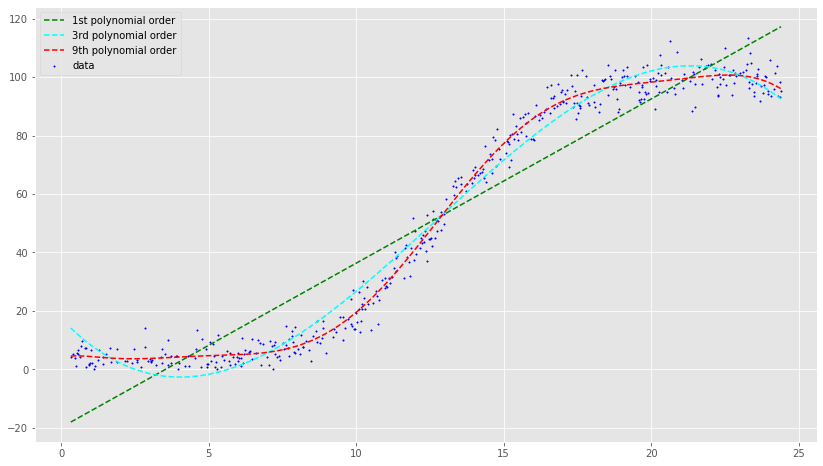

In [6]:
# adapted from https://stackoverflow.com/q/51732577
# create a shorthand for the column names
X = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1].values.reshape(-1,1)
plt.scatter(X, y, s=2, color='blue', label="data")

# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 1)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.plot(X, lin_reg.predict(X_poly), ls="--", color = 'green', label='1st polynomial order')

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.plot(X, lin_reg.predict(X_poly), ls="--", color = 'cyan', label='3rd polynomial order')

poly_reg = PolynomialFeatures(degree = 9)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.plot(X, lin_reg.predict(X_poly), ls="--", color = 'red', label='9th polynomial order')


# Visualising the Polynomial Regression results
plt.legend(loc='best')
plt.rcParams["figure.figsize"] = (14,8)
plt.show()

In [ ]:
# Polynomial regression for cleaned dataset

# a_plot = sns.lmplot(data=df, x="speed", y="power", order=9, height=5, aspect=3, scatter_kws={'s':1})

# a_plot.set(xlim=(0, 25))
# a_plot.set(ylim=(0, 120))
# plt.show()

The polynomial order=9 appears to closely follow the pattern of the data points in the domain (wind speed in range 0-25).

Let's now apply the Numpy's `polyfit()` to get the value of the coefficients that minimise the squared order and plot the polynomial function.

In [7]:
coeff = np.polyfit(df['speed'], df['power'], 9)
#coeff
yp = np.poly1d(coeff)

print("y = ")
print(yp)

y = 
           9             8             7            6           5
3.076e-08 x - 3.551e-06 x + 0.0001674 x - 0.004137 x + 0.05719 x
          4         3         2
 - 0.441 x + 1.835 x - 3.665 x + 2.535 x + 4.084


### Apply regression model

In this section I am developing a linear regression model, using sklearn package.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x=df["speed"], y=df["power"], test_size=0.3, random_state=101)

## Refs 
---

This project is based predominantly on the lecture materials - not explicitly quoted in the body of the notebook.


#### Wind Power

- [001] [Wikipedia - Wind power](https://en.wikipedia.org/wiki/Wind_power)
- [002] [Wind power - How to calculate power output of wind](https://www.windpowerengineering.com/calculate-wind-power-output)
- [003] [Energy education - Wind power](https://energyeducation.ca/encyclopedia/Wind_power)
- [004] [Wind works - wind turbine rating](http://www.wind-works.org/cms/index.php?id=85&tx_ttnews%5Btt_news%5D=2572&cHash=b74148dbab1938159937a994adf1f05b)


### Regression in Machine Learning

- [001] [Wikipedia - Linear Regression](https://en.wikipedia.org/wiki/Linear_regression)
- [002] [Towards Data Science - Introduction to Machine Learning algorithms: linear regression](https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a)
- [003] [Machine Learning Glossary - Linear regression](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html)
- [004] [Machine Learning Mastery - Linear regression for Machine Learning](https://machinelearningmastery.com/linear-regression-for-machine-learning/)
- [005] [Scikit-learn documentation - Polynomial regression](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)


#### Pickle

- [001] [Python documentation - Pickle module](https://docs.python.org/3/library/pickle.html)
- [002] [Datacamp - Pickle tutorial](https://www.datacamp.com/community/tutorials/pickle-python-tutorial)
- [003] [Stack Overflow - How to read pickle file](https://stackoverflow.com/a/35068080)
- [004] [YouTube - From Jupyter to pickle](https://youtu.be/3-KOE15utuQ)

#### Docker

- [001] [Docker - What is a container?](https://www.docker.com/resources/what-container)
- [002] [Dataquest - Running a Dockerized Jupyter Server for Data Science](https://www.dataquest.io/blog/docker-data-science)


#### Flask


___
Andrzej Kocielski